# Task one

I have chosen the data from 2017 from Vanautu.
The data and metadata were downloaded from [here](http://www.bom.gov.au/oceanography/projects/spslcmp/data/index.shtml).

## Source of data

Describe the source of the data.

## Display and describe data

First load in the data and see what it is from description and plots.

In [1]:
using Pkg
Pkg.activate("..")

  Activating environment at `~/Documents/GitHub/MATH5271/Project.toml`


In [2]:
using CSV, DataFrames, Plots

In [9]:
df_van = DataFrame(CSV.File("IDO70009_2017.csv"))
first(df_van, 10)

┌ Warning: thread = 1 warning: only found 10 / 11 columns around data row: 1. Filling remaining columns with `missing`
└ @ CSV /Users/Joey/.julia/packages/CSV/bLdMU/src/file.jl:621
┌ Warning: thread = 1 warning: only found 10 / 11 columns around data row: 2. Filling remaining columns with `missing`
└ @ CSV /Users/Joey/.julia/packages/CSV/bLdMU/src/file.jl:621
┌ Warning: thread = 1 warning: only found 10 / 11 columns around data row: 3. Filling remaining columns with `missing`
└ @ CSV /Users/Joey/.julia/packages/CSV/bLdMU/src/file.jl:621
┌ Warning: thread = 1 warning: only found 10 / 11 columns around data row: 4. Filling remaining columns with `missing`
└ @ CSV /Users/Joey/.julia/packages/CSV/bLdMU/src/file.jl:621
┌ Warning: thread = 1 warning: only found 10 / 11 columns around data row: 5. Filling remaining columns with `missing`
└ @ CSV /Users/Joey/.julia/packages/CSV/bLdMU/src/file.jl:621
┌ Warning: thread = 1 warning: only found 10 / 11 columns around data row: 6. Filling remaining

,Date & UTC Time,Sea Level,Water Temperature,Air Temperature,Barometric Pressure
,String31,Float64,Float64,Float64,Float64
1,01-Jan-2017 00:00,1.007,28.0,27.5,1006.5
2,01-Jan-2017 01:00,0.88,28.0,28.0,1006.0
3,01-Jan-2017 02:00,0.799,28.0,28.2,1005.7
4,01-Jan-2017 03:00,0.787,28.1,27.0,1005.3
5,01-Jan-2017 04:00,0.864,28.1,26.9,1005.0
6,01-Jan-2017 05:00,1.004,27.9,27.4,1005.0
7,01-Jan-2017 06:00,1.169,27.9,26.9,1005.4
8,01-Jan-2017 07:00,1.299,27.9,24.2,1006.2
9,01-Jan-2017 08:00,1.366,27.9,24.5,1006.4


In [19]:
rename!(df_van, ["DateTime", "Sea_level", "Water_temp", "Air_temp", 
        "Barometric_pressre", "Residuals", "Adj_residuals", "Wind_dir",
        "Wind_gust", "Wind_speed", "Vanuatu"])

describe(df_van)


,variable,mean,min,median,max,nmissing
,Symbol,Union…,Any,Union…,Any,Int64
1,DateTime,,01-Apr-2017 00:00,,31-Oct-2017 23:00,0
2,Sea_level,-32.2527,-9999.0,0.86,1.611,0
3,Water_temp,-139.772,-9999.0,27.0,31.0,0
4,Air_temp,-7.48828,-9999.0,25.6,32.7,0
5,Barometric_pressre,974.919,-9999.0,1011.2,1020.0,0
6,Residuals,-33.1366,-9999.0,-0.031,0.11,0
7,Adj_residuals,-33.1552,-9999.0,-0.054,0.128,0
8,Wind_dir,118.115,-9999,165.0,360,0
9,Wind_gust,-26.1054,-9999.0,2.9,19.3,0


Without having much else of an idea will take a look at some plots of `Sea level`, `Water Temperature`, and `Air Temperature`.

In [23]:
times = df_van[:, :DateTime]
sea_lvl = df_van[:, :Sea_level]
w_temp = df_van[:, :Water_temp]
a_temp = df_van[:, :Air_temp];


## Water temperature

First look at what the data for water temperature.

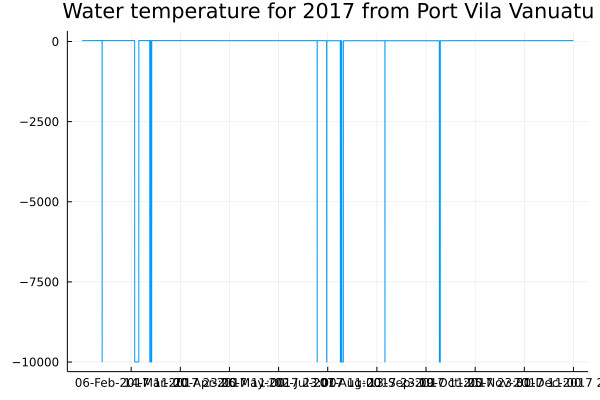

In [29]:
plot(times, w_temp, label = false, title = "Water temperature for 2017 from Port Vila Vanuatu")

There look to be some suspicous data points so will need to clean these up. 
Check the metadata but looks to be something like a default value for -9999.0 if there is no info.
Remove all data from the `w_temp` that has a value of -9999.0.

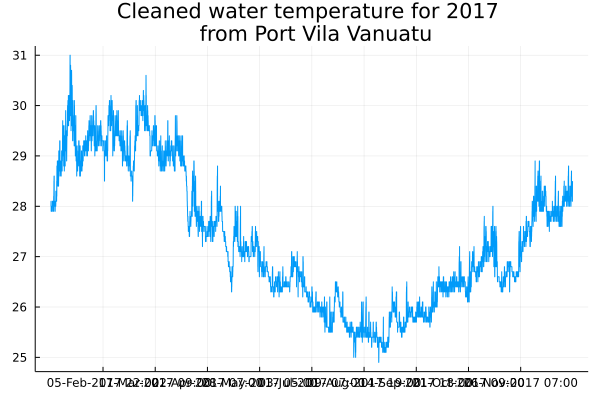

In [41]:
find = findall(w_temp .!= -9999.0)
times_water = times[find]
water_temp = w_temp[find]
plot(times_water, water_temp, label = false, title = "Cleaned water temperature for 2017 \n from Port Vila Vanuatu")

## Air temperature
First plot the full air temperature data.

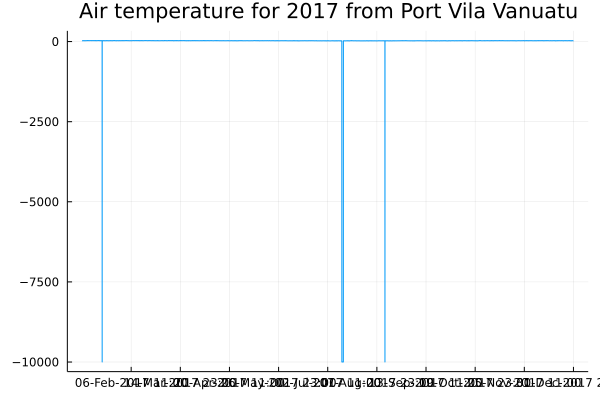

In [26]:
plot(times, a_temp, label = false, title = "Air temperature for 2017 from Port Vila Vanuatu")

Again have to remove the data entries corresponding to -9999.0.

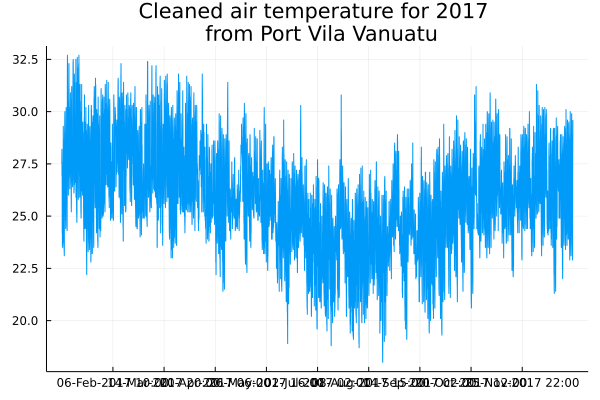

In [46]:
find = findall(a_temp .!= -9999.0)
times_air = times[find]
air_temp = a_temp[find]
plot(times_air, air_temp, label = false, title = "Cleaned air temperature for 2017 \n from Port Vila Vanuatu")

## Sea level
First look at the full sea level data

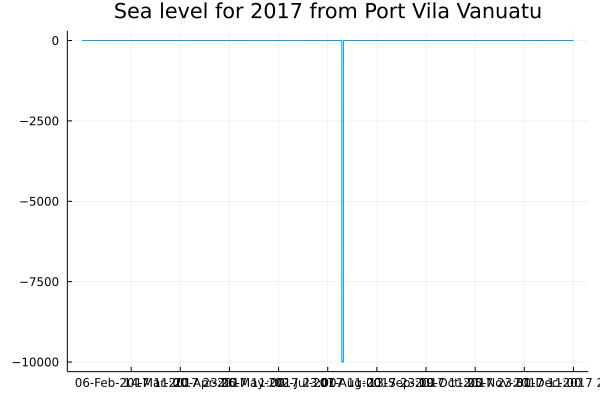

In [48]:
plot(times, sea_lvl, label = false, title = "Sea level for 2017 from Port Vila Vanuatu")

Again there is data corresponding to -9999.0 that needs to be removed.

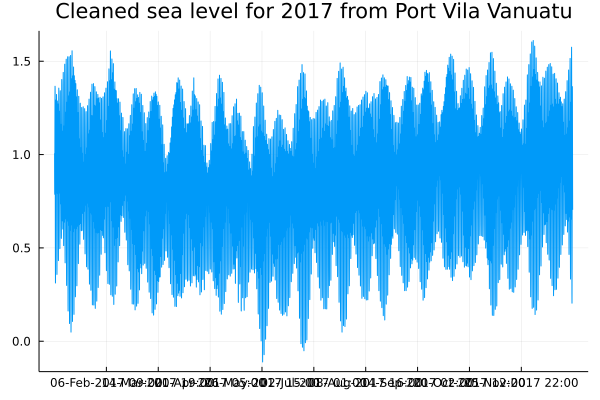

In [50]:
find = findall(sea_lvl .!= -9999.0)
times_sea = times[find]
sea_l = sea_lvl[find]
plot(times_sea, sea_l, label = false, title = "Cleaned sea level for 2017 from Port Vila Vanuatu")